In [6]:
import sqlite3

In [14]:
import numpy as np
import pandas as pd
import sqlite3

conn = sqlite3.connect('FPA_FOD_20170508.sqlite')
print("Connection Successful")
df = pd.read_sql("SELECT DISCOVERY_TIME, SOURCE_REPORTING_UNIT_NAME from Fires where SOURCE_REPORTING_UNIT_NAME = 'Plumas National Forest'",con=conn)
#df = pd.read_sql("SELECT DISTINCT SOURCE_REPORTING_UNIT_NAME from Fires",con=conn)

df.head(10)
# conn.close()


Connection Successful


,DISCOVERY_TIME,SOURCE_REPORTING_UNIT_NAME
0,1300,Plumas National Forest
1,1600,Plumas National Forest
2,1745,Plumas National Forest
3,1458,Plumas National Forest
4,1812,Plumas National Forest
5,0828,Plumas National Forest
6,1340,Plumas National Forest
7,1622,Plumas National Forest
8,1505,Plumas National Forest
9,1722,Plumas National Forest


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

In [4]:
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
# Changing the data format for the above columns

### Code to check the missing values.

In [5]:
total= df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys = ['Total missing values', 'Percentage of missing values'])
missing_data

,Total missing values,Percentage of missing values
COMPLEX_NAME,1875282,0.997244
MTBS_ID,1869462,0.994149
MTBS_FIRE_NAME,1869462,0.994149
ICS_209_INCIDENT_NUMBER,1854748,0.986324
ICS_209_NAME,1854748,0.986324
FIRE_CODE,1555636,0.827261
LOCAL_FIRE_REPORT_ID,1459286,0.776024
CONT_TIME,972173,0.516985
FIRE_NAME,957189,0.509017
CONT_DOY,891531,0.474101


## SAMPLING TECHNIQUE 1:
Using Simple Sample method of Pandas DF. Taking 20% of the original data. (376093 entries)

In [6]:
fires_sample = df.sample(frac=2/10, random_state=10)
fires_sample.info()
# taking 20% of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376093 entries, 1466193 to 1076111
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   OBJECTID                    376093 non-null  int64         
 1   FOD_ID                      376093 non-null  int64         
 2   FPA_ID                      376093 non-null  object        
 3   SOURCE_SYSTEM_TYPE          376093 non-null  object        
 4   SOURCE_SYSTEM               376093 non-null  object        
 5   NWCG_REPORTING_AGENCY       376093 non-null  object        
 6   NWCG_REPORTING_UNIT_ID      376093 non-null  object        
 7   NWCG_REPORTING_UNIT_NAME    376093 non-null  object        
 8   SOURCE_REPORTING_UNIT       376093 non-null  object        
 9   SOURCE_REPORTING_UNIT_NAME  376093 non-null  object        
 10  LOCAL_FIRE_REPORT_ID        84369 non-null   object        
 11  LOCAL_INCIDENT_ID           2120

## SAMPLING TECHNIQUE 2:
Taking 15K samples from each year.

In [7]:
df1 = pd.read_sql("SELECT * FROM Fires WHERE FIRE_YEAR = 2015 LIMIT 15000",con=conn)

In [8]:
df1.shape

(15000, 39)

In [9]:
for i in range(1992,2014):
    Query1 = "SELECT * FROM Fires WHERE FIRE_YEAR = ? LIMIT 15000"
    df1 = df1.append(pd.read_sql(Query1, conn, params = [i]))

In [10]:
df1.shape

(345000, 39)

### Sampling data based on year(getting equal number of records per year)


In [11]:
new_df = df.groupby('FIRE_YEAR').apply(lambda x: x.sample(n=5000)).reset_index(drop = True)

In [12]:
new_df.size

4680000

In [13]:
uniq = df['FIRE_YEAR'].unique()
new_df['STAT_CAUSE_CODE'].value_counts()

5.0     27445
9.0     20267
1.0     18039
7.0     17820
13.0    10620
2.0      9485
4.0      5039
8.0      3788
3.0      3480
6.0      2120
11.0      904
10.0      747
12.0      246
Name: STAT_CAUSE_CODE, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1bd3e4eb0>]],
      dtype=object)

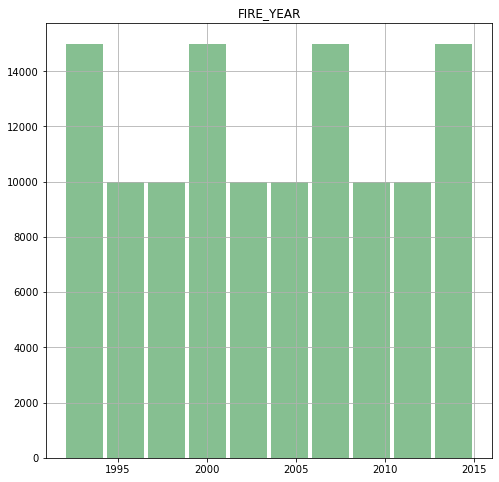

In [14]:
import matplotlib.pyplot as plt
new_df.hist(column="FIRE_YEAR", figsize=(8,8), color='#86bf91', rwidth=0.9)

### Sampling Technique 3 - Take 20% samples from each STAT_CAUSE_CODE and FIRE_YEAR group. Since we are predicting the cause, it is important to take enough samples from each cause. Since we are going to make analysis on the causes of wildfire over years, it is also important to take enough samples from all years

In [15]:
df_by_cause_year = df.groupby(['STAT_CAUSE_CODE', 'FIRE_YEAR'])
df_by_cause_year.describe()

OBJECTID                                          \
                             count          mean            std        min   
STAT_CAUSE_CODE FIRE_YEAR                                                    
1.0             1992       12230.0  2.527910e+05  342504.392951    41876.0   
                1993        7539.0  4.240679e+05  449688.236367    53304.0   
                1994       16204.0  2.358077e+05  302449.731858    60902.0   
                1995        8075.0  3.003203e+05  359926.970744    75459.0   
                1996       12634.0  2.490339e+05  295577.084503    84740.0   
...                            ...           ...            ...        ...   
13.0            2011       13903.0  1.559030e+06  107173.541433  1459301.0   
                2012        3735.0  1.665889e+06  112573.572264  1565795.0   
                2013        4241.0  1.674975e+06   56003.546701  1642884.0   
                2014        3701.0  1.779357e+06   32669.041548  1728635.0   
                2015        6276.0  1.849430e+06   21966.087009  1792723.0   

                                                                         \
                                  25%        50%         75%        max   
STAT_CAUSE_CODE FIRE_YEAR                                                 
1.0             1992         46288.25    51044.0   233335.75  1429058.0   
                1993         56756.50   219808.0   953007.50  1860064.0   
                1994         66003.75    72185.5   230902.25  1431404.0   
                1995         78970.50   187793.0   236916.50  1438690.0   
                1996         89555.75    95187.5   231806.75  1440356.0   
...                               ...        ...         ...        ...   
13.0            2011       1506363.50  1512485.0  1516802.50  1880251.0   
                2012       1582825.00  1616896.0  1635304.00  1880281.0   
                2013       1652860.00  1655662.0  1678895.00  1880415.0   
                2014       1786426.00  1787351.0  1788276.00  1880431.0   
                2015       1853312.75  1854930.5  1856499.25  1880464.0   

                            FOD_ID                ...   LONGITUDE             \
                             count          mean  ...         75%        max   
STAT_CAUSE_CODE FIRE_YEAR                         ...                          
1.0             1992       12230.0  4.353398e+05  ... -110.590486 -68.066667   
                1993        7539.0  1.837476e+06  ...  -83.816667 -67.199996   
                1994       16204.0  4.359959e+05  ... -108.584000 -68.049500   
                1995        8075.0  1.022692e+06  ... -107.720317 -67.499400   
                1996       12634.0  6.526346e+05  ... -108.584000 -71.325000   
...                            ...           ...  ...         ...        ...   
13.0            2011       13903.0  2.057538e+08  ...  -77.897400 -65.264175   
                2012        3735.0  2.243872e+08  ... -116.672385 -65.273611   
                2013        4241.0  2.086902e+08  ...  -94.034040 -65.305833   
                2014        3701.0  3.001269e+08  ... -112.090100 -65.402941   
                2015        6276.0  3.002806e+08  ... -110.427425 -65.985000   

                          OWNER_CODE                                        \
                               count       mean       std  min   25%   50%   
STAT_CAUSE_CODE FIRE_YEAR                                                    
1.0             1992         12230.0   5.594031  3.807187  1.0   4.0   5.0   
                1993          7539.0   6.650219  4.535562  1.0   4.0   5.0   
                1994         16204.0   5.439891  3.655052  1.0   3.0   5.0   
                1995          8075.0   5.486192  3.943922  1.0   2.0   5.0   
                1996         12634.0   5.014010  3.637241  1.0   2.0   5.0   
...                              ...        ...       ...  ...   ...   ...   
13.0            2011         13903.0  13.082716  2.582725  

In [16]:
df_by_cause_year = df.groupby(['STAT_CAUSE_CODE', 'FIRE_YEAR']).apply(lambda x: x.sample(frac=0.2)).reset_index(drop = True)
df_by_cause_year['STAT_CAUSE_CODE'].value_counts()

5.0     85807
9.0     64763
7.0     56290
1.0     55695
13.0    33345
2.0     29525
4.0     15225
8.0     12232
3.0     10575
6.0      6693
11.0     2892
10.0     2300
12.0      759
Name: STAT_CAUSE_CODE, dtype: int64

In [17]:
df_by_cause_year['FIRE_YEAR'].value_counts()

2006    22801
2000    19282
2007    19116
2011    18112
1999    17873
2005    17723
2001    17317
2008    17077
2010    15978
2009    15664
1994    15192
2002    15130
1996    15115
2015    14898
2012    14555
1995    14294
2004    13855
1998    13674
2003    13653
1992    13596
2014    13552
2013    12956
1993    12399
1997    12289
Name: FIRE_YEAR, dtype: int64

### End of Sampling Technique 3

In [18]:
#conn.close

In [19]:
df['STAT_CAUSE_CODE'].value_counts()

5.0     429028
9.0     323805
7.0     281455
1.0     278468
13.0    166723
2.0     147612
4.0      76139
8.0      61167
3.0      52869
6.0      33455
11.0     14448
10.0     11500
12.0      3796
Name: STAT_CAUSE_CODE, dtype: int64

In [20]:
df_grpby_cause = df.groupby('STAT_CAUSE_CODE').apply(lambda x: x.sample(n=3796)).reset_index(drop = True)
df_grpby_cause['STAT_CAUSE_CODE'].value_counts()

7.0     3796
13.0    3796
6.0     3796
10.0    3796
3.0     3796
11.0    3796
5.0     3796
9.0     3796
12.0    3796
8.0     3796
4.0     3796
2.0     3796
1.0     3796
Name: STAT_CAUSE_CODE, dtype: int64

### There are some majority classes like 5,9,7,1 and grouping by CAUSE will diminish their importance, lowering down their importance equal to a cause which has not appeared more than 3k. We are not dealing with such a system where fire cuase that has lower number matters the most. This is not a critical cause like predicting cancer cases. where number of lower cases

In [21]:
df_grpby_year = df_grpby_cause.groupby('FIRE_YEAR').apply(lambda x: x.sample(n=1000))

In [22]:
print(df_grpby_year.size())

TypeError: 'numpy.int64' object is not callable

In [ ]:
df_grpby_year.shape